## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines. Some of the people show interest in the courses and provide their email address or phone number, they are classified to be a lead. 

Although X Education gets a lot of leads, its lead conversion rate is very poor. X Education needs help in selecting the most promising leads. The wants to build a model wherein a lead score can be assigned to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Solution

As the company X wants to assign a lead score to different leads, which simply means that they would like to classify their leads, we will use logistic regression which is a classification model, to derive a solution. 

We will take the following steps to build a logictics regression model: - 

1. Import necessary python libraries 
2. Import data shared by X Education
3. Inspect the Dataframe
4. Prepare the data (Encoding Categorical Variables, Handling Null Values)
5. Carry out Exploratory Data Analysis (univariate analysis, outlier detection, checking data imbalance)
6. Model Building (Stats Model, Feature Selection Using RFE, R-squared, VIF and p-values, Recall)
7. Evaluation of the model with different metrics: - Sensitivity, Specificity

## Step 1: Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Model evaluation
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

# Warning Suppression
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

## Step 2: Importing Data

In [7]:
data = pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
data.shape

(9240, 37)

## Step 3: Inspection of the Dataframe

In [10]:
#info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
# Checking summary of the data
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 4: Preparing the Data

In [13]:
# We will now look for duplicates in the data by inspecting variables "Prospect ID" and "Lead Numbers"

duplicate_prospect_ID = data.duplicated(subset = 'Prospect ID')

print (sum(duplicate_prospect_ID) == 0)

True


In [14]:
duplicate_lead_number = data.duplicated(subset = 'Lead Number')

print (sum(duplicate_lead_number) == 0)

True


#### As no duplicates were found we can decipher that the "Prospect ID" and "Lead Number" refer to unique customers. 
#### We will now drop the above variables as they do not provide any further insights and hence are not required for model building.

In [16]:
data.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

#### The problem stattement mentions that "Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value". It can be interpreted from the above statement that the leads did not click on any selection from the drop down menu. Hence we will convert all the "selects" to NaN.

In [18]:
data = data.replace('Select', np.nan)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [20]:
# Let's check for null values 
data.isnull().sum().sum()

54419

In [21]:
# Let's check for null values per column 
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [22]:
# Let's find the ratio of null vaules present in each column
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### Missing Value Handling

In [24]:
# We will now drop columns having more than 40% null values
columns =data.columns

for i in columns:
    if((100*(data[i].isnull().sum()/len(data.index))) >= 40):
        data.drop(i, axis=1, inplace = True)

In [25]:
# Let's check the data post removal of Null values 
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## Step 5: Exploratory Data Analysis

### We will now carry out exploratory data analysis on the categorical variables

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [29]:
#Value counts of Country column
data['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

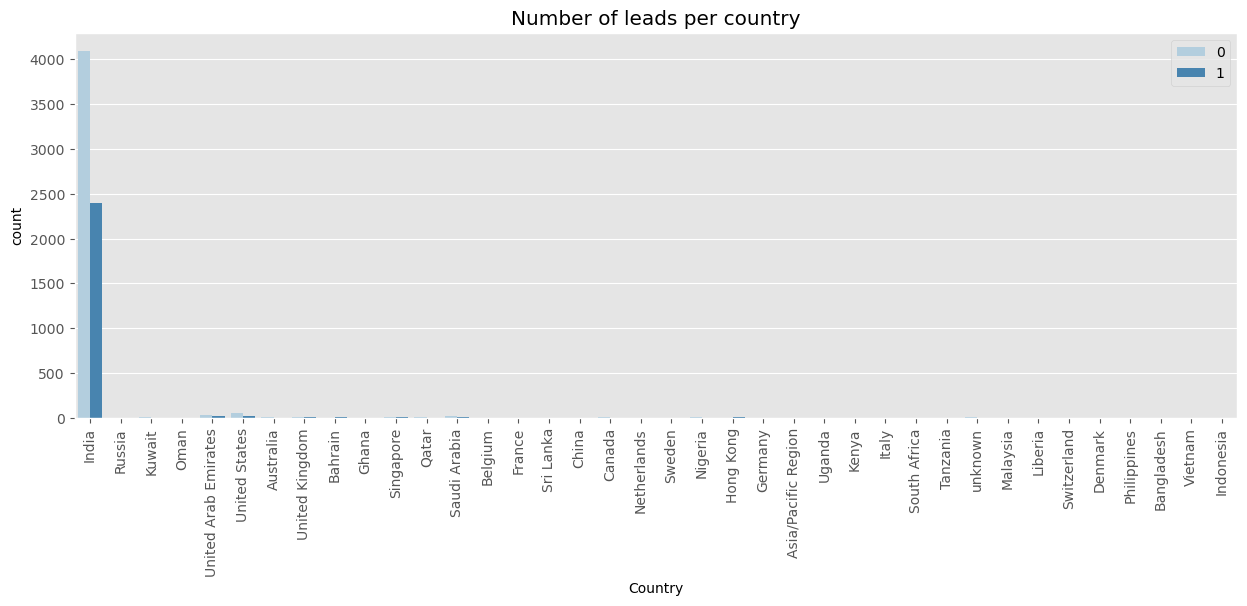

In [31]:
# Let's Visualise the Country column

#Setting the frame
plt.figure(figsize=(15,5))

#Visualing the Countplot
Count_fig = sns.countplot(x='Country', hue='Converted', data=data, palette='Blues')
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)

# Formatting the figure
plt.title("Number of leads per country")
plt.legend(loc=1)
plt.show()

In [32]:
# From the above chart, we observe that most of the leads were of Indian origin and some of them might have not selected a country.
# We will proceed to replace null values with India.

data['Country'] = data['Country'].replace(np.nan,'India')

In [33]:
# Let's check the value count after imputing the null values
data['Country'].value_counts()

Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

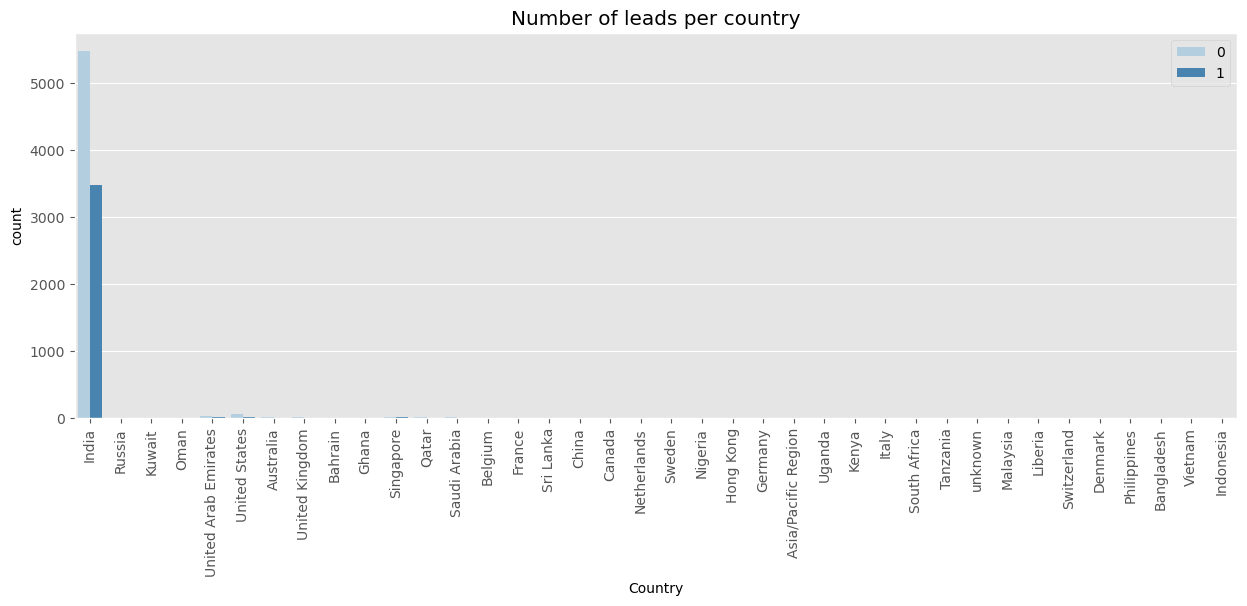

In [34]:
# Let's Visualise the Country column post imputing the null values

#Setting the frame
plt.figure(figsize=(15,5))

#Visualing the Countplot
Count_fig = sns.countplot(x='Country', hue='Converted', data=data, palette='Blues')
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)

# Formatting the figure
plt.title("Number of leads per country")
plt.legend(loc=1)
plt.show()

#### As "India" is appearing quite frequently in the country column, it could lead to biased analysis. Hence we will drop the country column.  

In [36]:
# Dropping Country column from data
data.drop('Country',axis=1,inplace=True)

In [37]:
#Checking data post removal of country column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [38]:
# Let's check Column 'City'

data['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

### We can observe that most of the leads were from mumbai, we will impute null values with Mumbai.

In [40]:
data['City'] = data['City'].replace(np.nan,'Mumbai')

In [41]:
# Let's check the count of City Column after replacing Null values
data['City'].value_counts(dropna=False)

City
Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

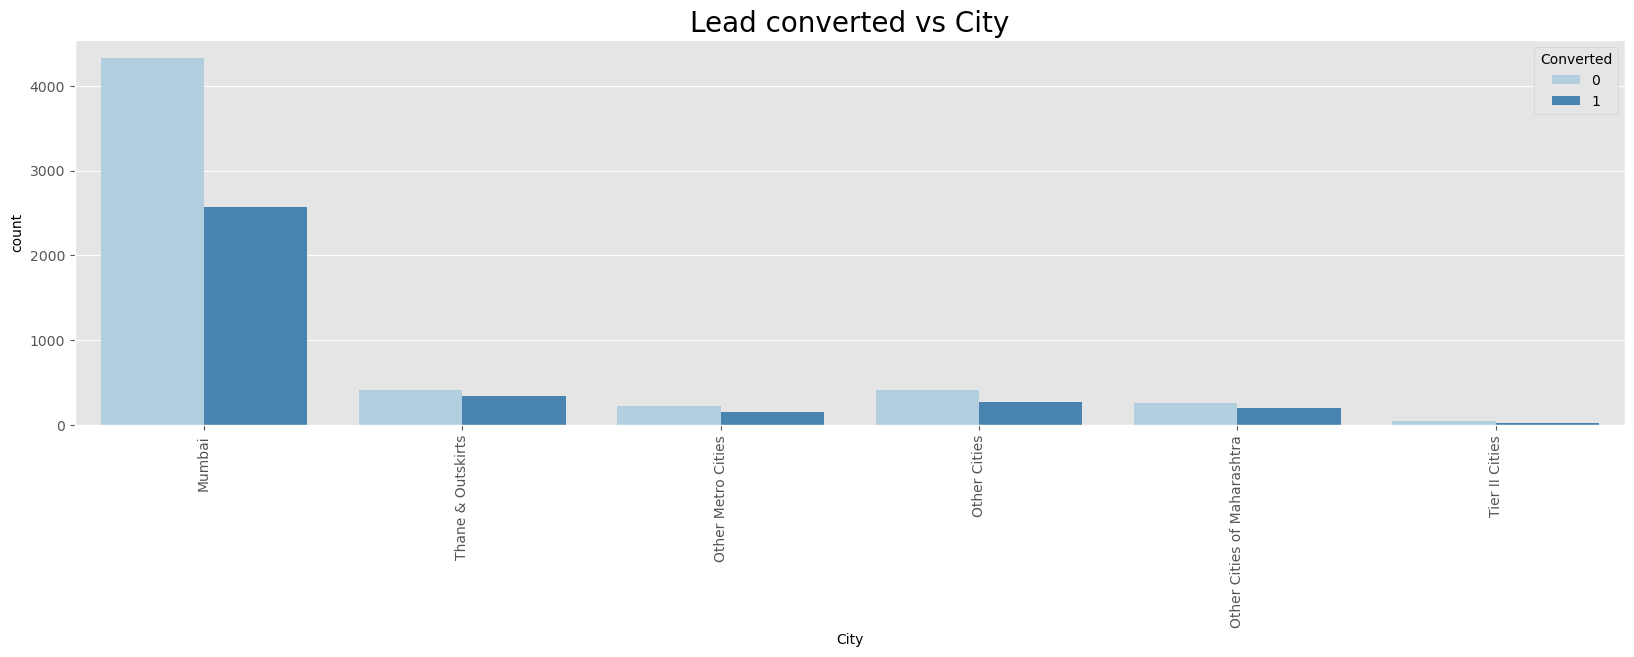

In [42]:
# Let's Visualise the City columnn post amending Null values

plt.figure(figsize=(20,5))

#Visualising using Countplot
count_fig = sns.countplot(x='City', hue='Converted', data=data, palette='Blues')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the figure
plt.title("Lead converted vs City",fontsize=20)
plt.show()

### As mentioned earlier most of the leads were from Mumbai.

In [44]:
# Let's check the data post imputing null values with Mumbai
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [45]:
# Let's now check the Specialization column
data['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [46]:
# Many leads have not mentioned/selected their specialization, we will proceed to replace NaN with "Not Selected".

data['Specialization'] = data['Specialization'].replace(np.nan, 'Not Specified')

# Let's check the Specialization column post replacment
data['Specialization'].value_counts()

Specialization
Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

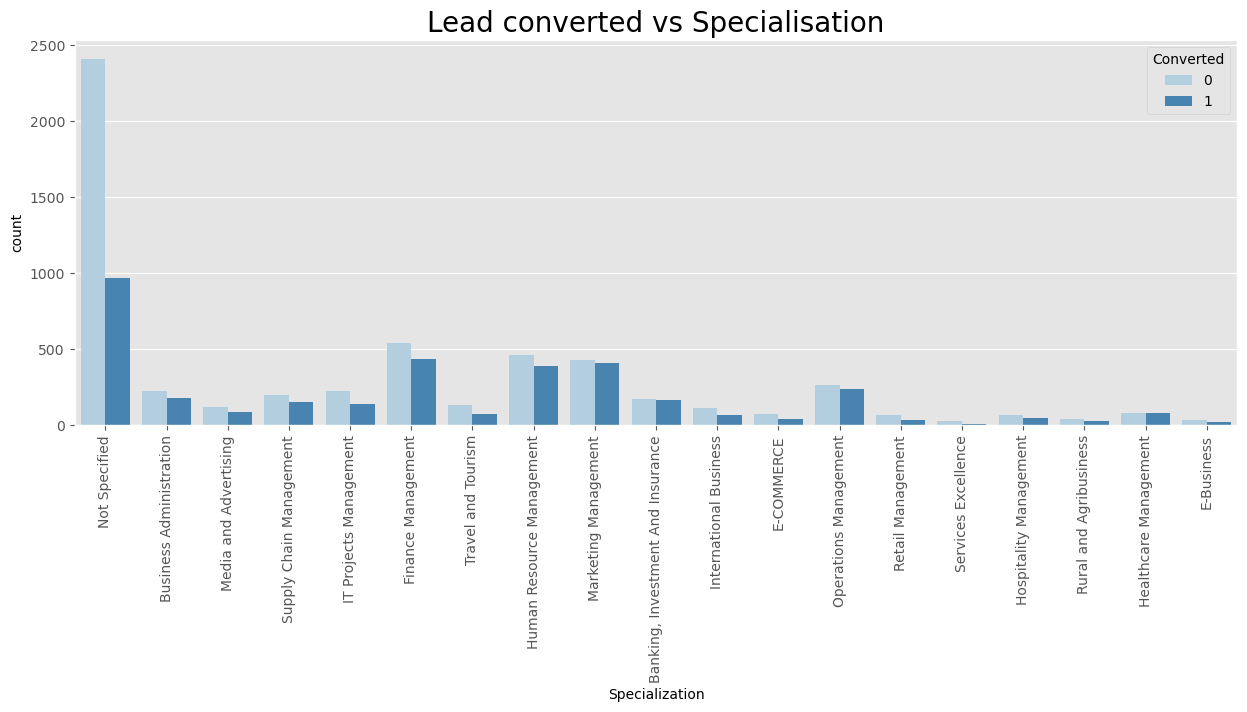

In [47]:
# We will now plot the spread of the Specialization columnn 

#Setting the frame
plt.figure(figsize=(15,5))

# We will use countplot for visualisation

count_fig=sns.countplot(x = 'Specialization', hue='Converted', data=data, palette='Blues')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Lead converted vs Specialisation",fontsize=20)
plt.show()

In [48]:
#### We can observe that some "Management" related specilazations like Finance, HR, and Operations, generate more leads and have higher conversion rates.

In [49]:
# As there are different types of management specilizations we will combine them under heading Mngt_Specialization for simplicity.  

data['Specialization'] = data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Mngt_Specialization') 

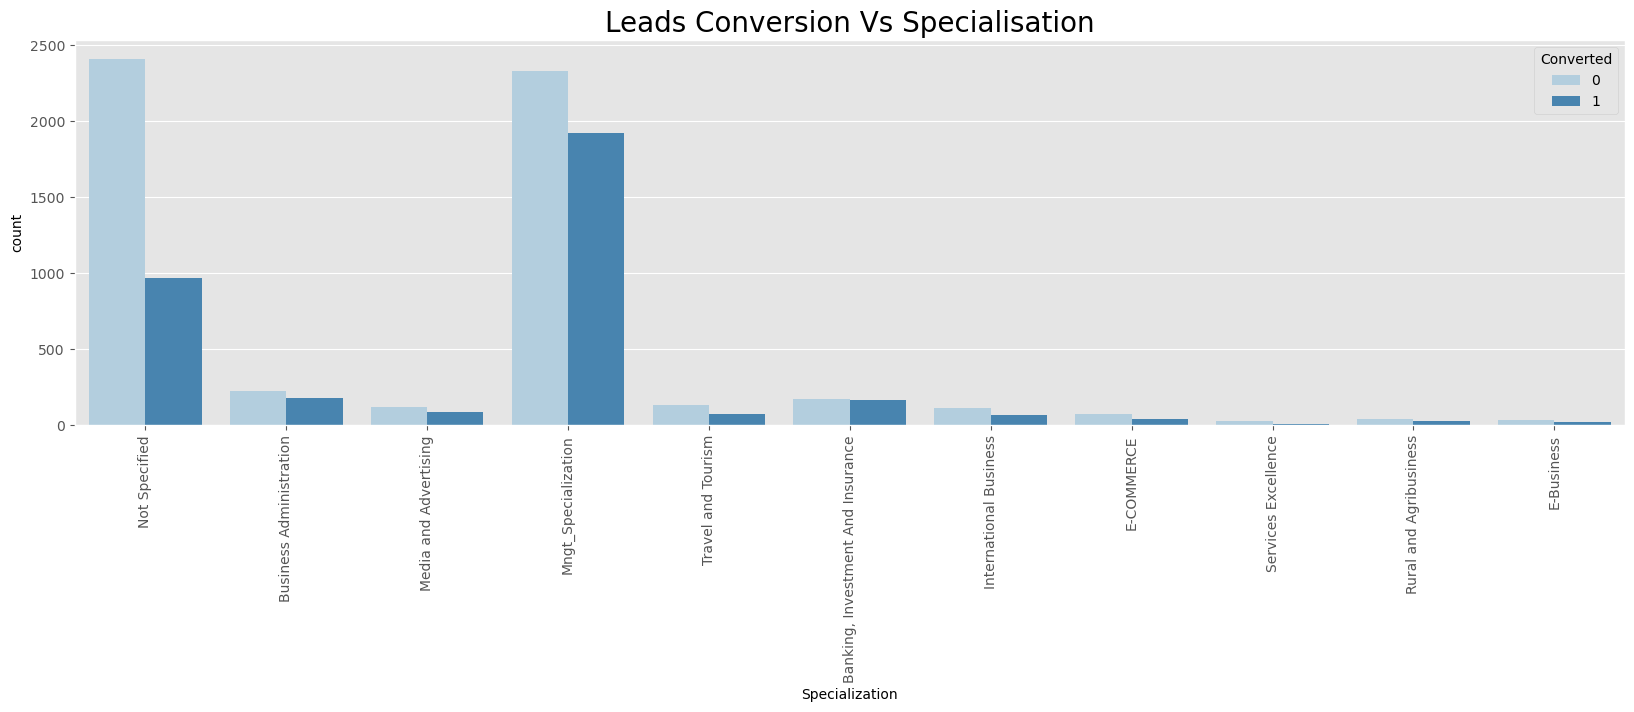

In [50]:
# Let's plot the Specialization column post consolidation

#Setting the frame
plt.figure(figsize=(20,5))

# We will use countplot for Visualisation 

count_fig=sns.countplot(x='Specialization', hue='Converted', data=data, palette='Blues')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion Vs Specialisation",fontsize=20)
plt.show()

In [51]:
    # Let's check the "What is your current occupation" variable
data['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

#### We can observe that most of the leads were unemployed, however we still have some NaN values. We will replace NaN with "Unemployed".

In [53]:
# Let's replace NaN values with "Unemployed"

data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

# Let's check the value counts after imputing

data['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

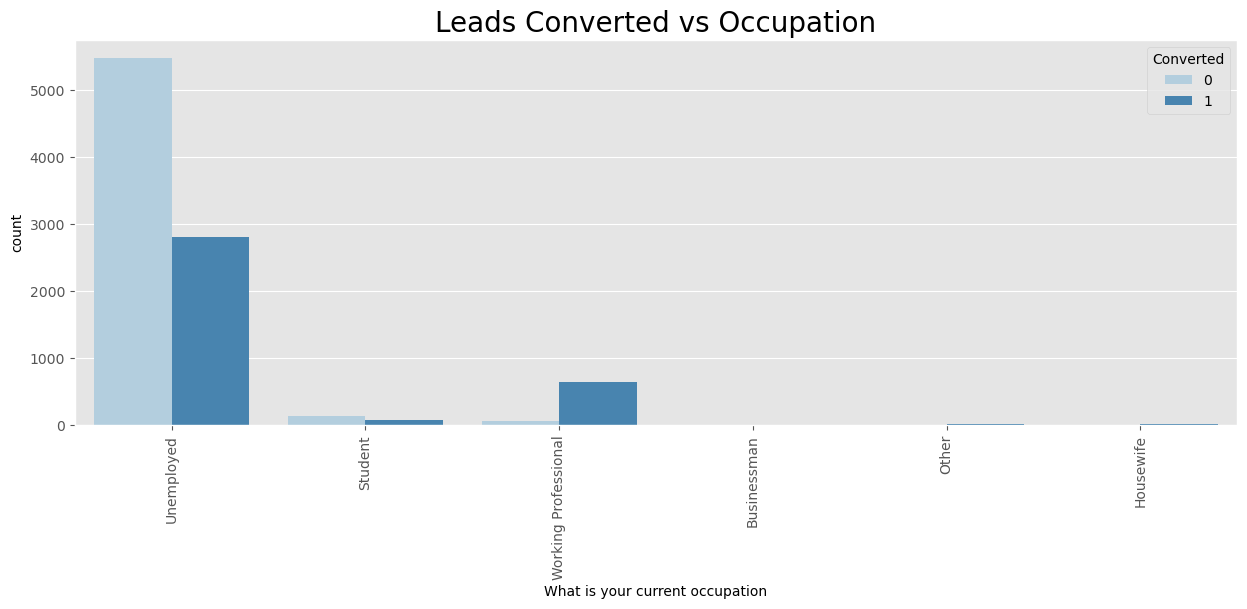

In [54]:
# Let's visualise the Occupation Variable
# Setting the frame
plt.figure(figsize=(15,5))

# We will use countplot for visualisation

count_fig=sns.countplot(x ='What is your current occupation', hue='Converted', data=data ,palette='Blues')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Converted vs Occupation",fontsize=20)
plt.show()

In [55]:
# Let's check the Ratio of categories after imputing
data['What is your current occupation'].value_counts(dropna=False,normalize = True,ascending=False)*100

What is your current occupation
Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

## Observations

#### - Majority of the leads come from people who are unemployed.
#### - Working professionals are more likely to become customers
#### - Students, Bussinessmen, Others and Housewives do not show much interest and are less likely to become customers.

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 9240 

In [59]:
# Let's check the variable "What matters most to you in choosing a course"

data['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

#### We can observe that most of the leads selected "Better Career Prospects", however we still have some NaN values. We will replace NaN with "Better Career Prospects".

In [61]:
data ['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')
# Let's check the value counts after imputing
data['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

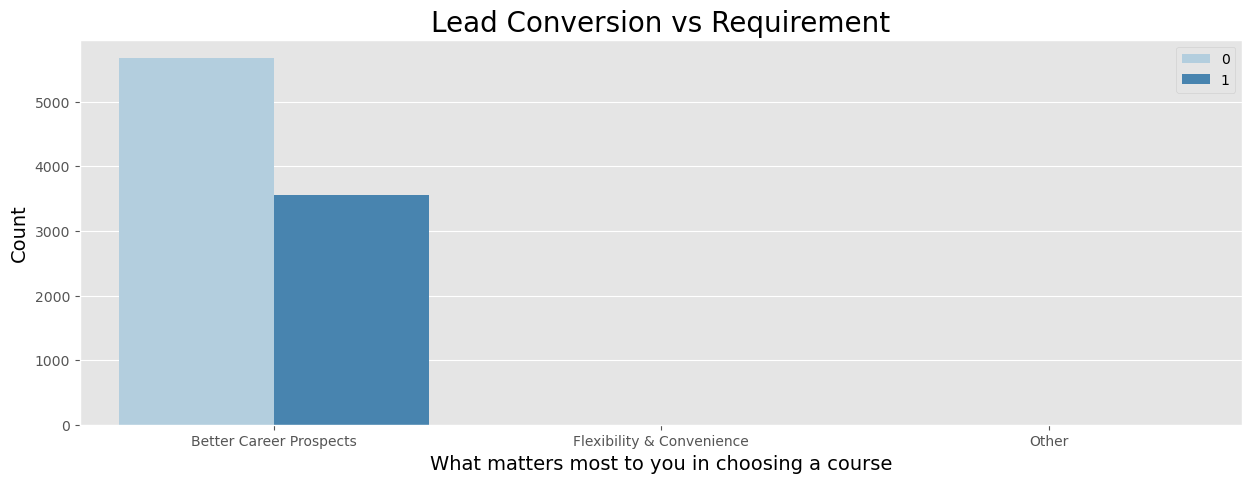

In [62]:
# Let's visulaise the above variable 

#Setting the frame
plt.figure(figsize=(15,5))

# We will use countplot for visualisation
count_fig=sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=data, palette='Blues')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=0)

#Formatting the plot
plt.title("Lead Conversion vs Requirement",fontsize=20)
plt.xlabel("What matters most to you in choosing a course", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

In [63]:
# Let's check the ratio of the above variable 
data['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)*100

What matters most to you in choosing a course
Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64

#### Like we highlighted earlier, this variable heavily influences the column. We will proceed to drop above column inorder to avoid bias.

In [65]:
data.drop('What matters most to you in choosing a course', axis=1,inplace=True)

# Data check post removing the variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [66]:
# Let's check the variable "Tags"

data['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

#### It appears that the sales team has not tagged many of the leads. We will replace NaN with 'Not tagged'. 

In [68]:
# LLet's replace Nan values in Tag with "Not Tagged"
data['Tags'] = data['Tags'].replace(np.nan,'Not Tagged')

# Let's check the value counts post imputing 
data['Tags'].value_counts(dropna=False)

Tags
Not Tagged                                           3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

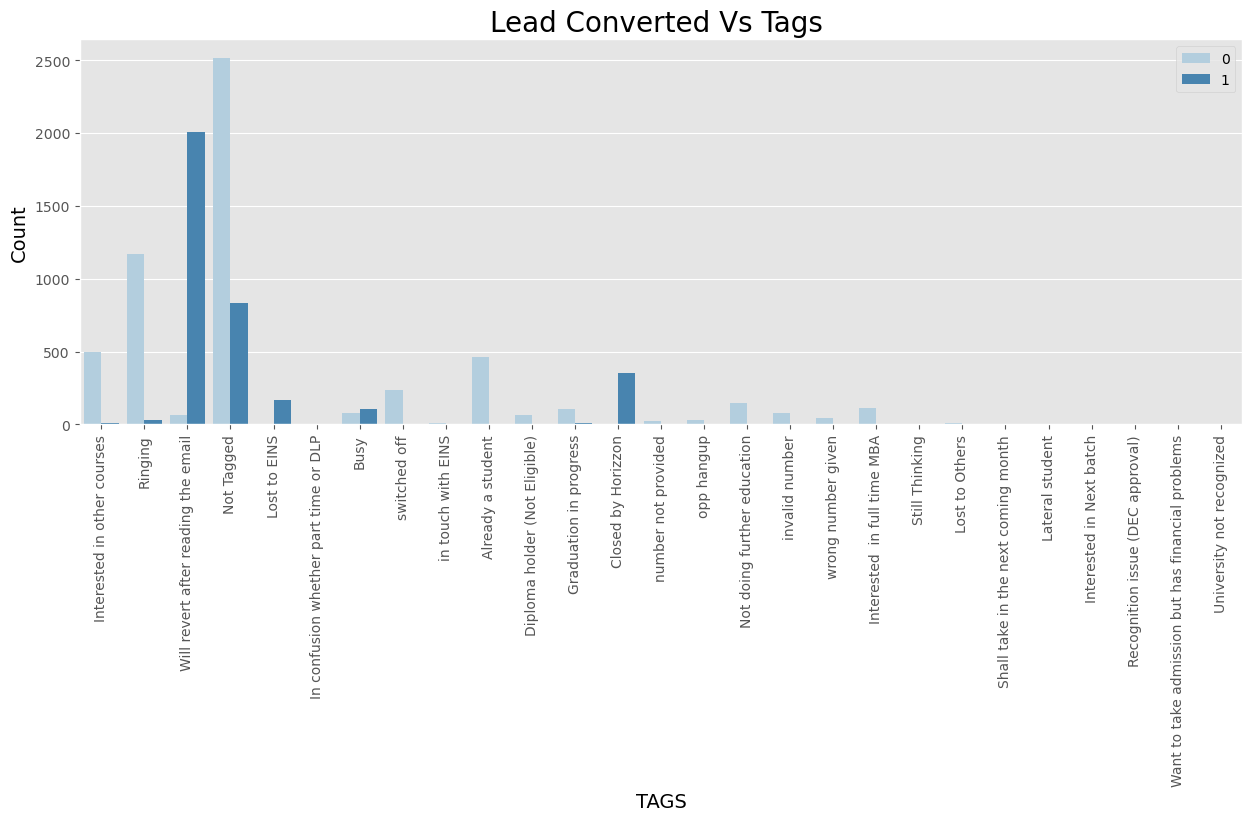

In [69]:
# Let's visualise the above variable 

#Setting the frame
plt.figure(figsize=(15,5))

# We will use countplot for visualisation

count_fig=sns.countplot(x='Tags', hue='Converted', data=data, palette='Blues')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Lead Converted Vs Tags ",fontsize=20)
plt.xlabel("TAGS", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

In [70]:
# As multiple tags have very few value counts, we will replace them with "Others"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                     'invalid number','wrong number given','Interested  in full time MBA'], 'Others')

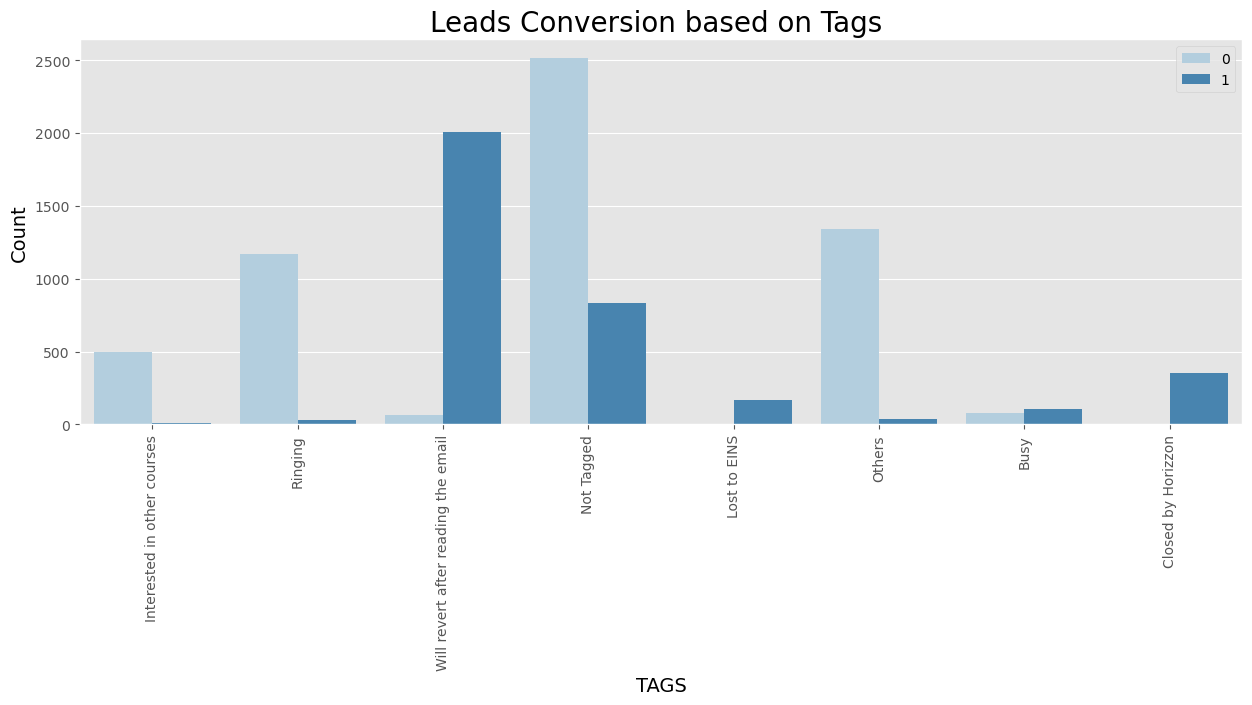

In [71]:
# Let's visualise the Tags

#Setting the frame
plt.figure(figsize=(15,5))

# We will use countplot for visualisation

count_fig=sns.countplot(x='Tags', hue='Converted', data=data,palette='Blues')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Tags ",fontsize=20)
plt.xlabel("TAGS", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [73]:
# Checking the data for null values
data.isnull().sum()

Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Tags                                          0
Update me on Supply Chain Content       

In [74]:
# Let's check the variable "Lead Source"

data['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

#### We will replace NaN with 'Others' as the null values are low. 

In [76]:
data['Lead Source'] = data['Lead Source'].replace(np.nan,'Others')

# Let's check value counts of Lead Source post imputing

data['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Others                 36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [77]:
# There are many variables with low values and hence we will club them along with 'Others'

data['Lead Source'] = data['Lead Source'].replace('google','Google')
data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')   

data['Lead Source'].value_counts(dropna=False)

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: count, dtype: int64

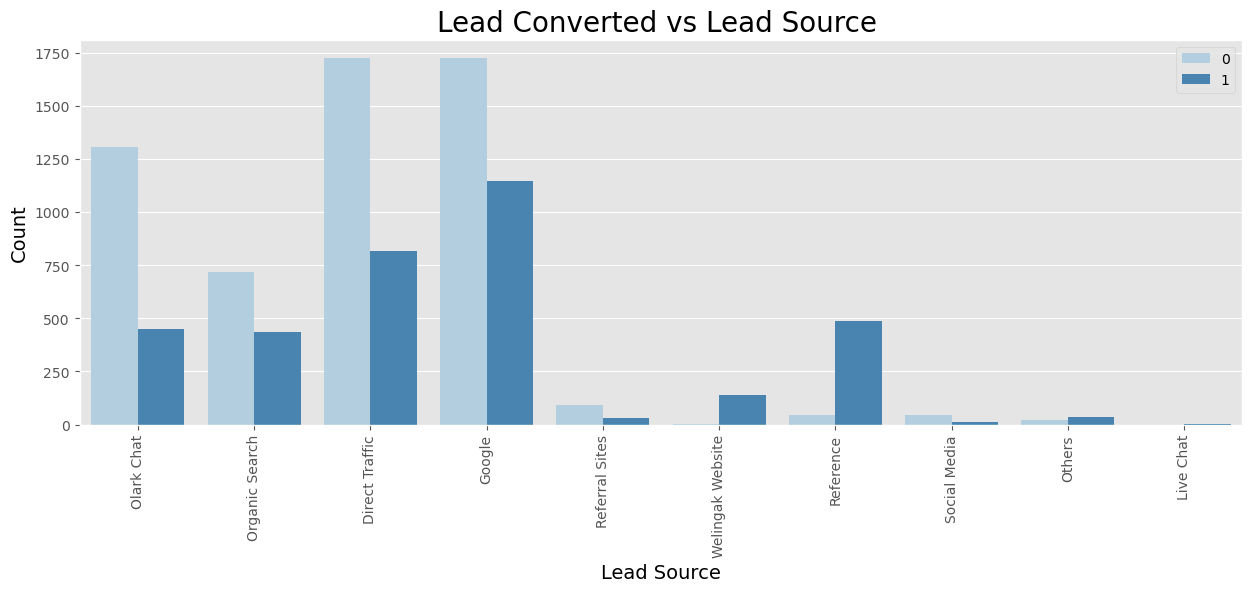

In [78]:
# Let's visulaise the Lead Score

#Setting the frame
plt.figure(figsize=(15,5))

# We will use countplot for visualisation

count_fig=sns.countplot(x='Lead Source', hue='Converted', data=data,palette='Blues')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Lead Converted vs Lead Source ",fontsize=20)
plt.xlabel("Lead Source", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

## Observations

#### - Most of the lead conversion is taking place through google and direct traffic
#### - References and the Welingak Website are the highest contributors to succesful lead conversions
#### - Lead conversion could be enanched by focusing on Olark Chat, Organic Searches Direct Traffic, and Google 
#### - It would be beneficial to increase leads from references and the Welingak website.


In [80]:
# Let's check the variable "Last Activity"

data['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [81]:
# Let's check the ratio of categories

data['Last Activity'].value_counts(dropna=False, normalize = True)*100

Last Activity
Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: proportion, dtype: float64

In [82]:
# Let's convert the Null values to 'Others'
data['Last Activity'] = data['Last Activity'].replace(np.nan,'Others')

In [83]:
# As there are some categories with values less than 1% we will club them with 'Others'
data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [84]:
# Let's check value counts of Last Activity post imputing

data['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [86]:
# Let's check value counts of Last Activity post imputing check the Ratio of the NA variables within the data set
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

#### We can see that there are couple of NA variables, however as the percentage is very low, we will drop those rows.

In [88]:
# Removing NA values
data = data.dropna()

# Checking data post removal of NA
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

In [89]:
# Let's check value counts of Last Activity post imputing

data['Last Activity'].value_counts(dropna=False)


Last Activity
Email Opened                 3437
SMS Sent                     2738
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Others                        193
Form Submitted on Website     116
Name: count, dtype: int64

In [90]:
# Let's check the variable "Lead Origin"

data['Lead Origin'].value_counts(dropna=False)


Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: count, dtype: int64

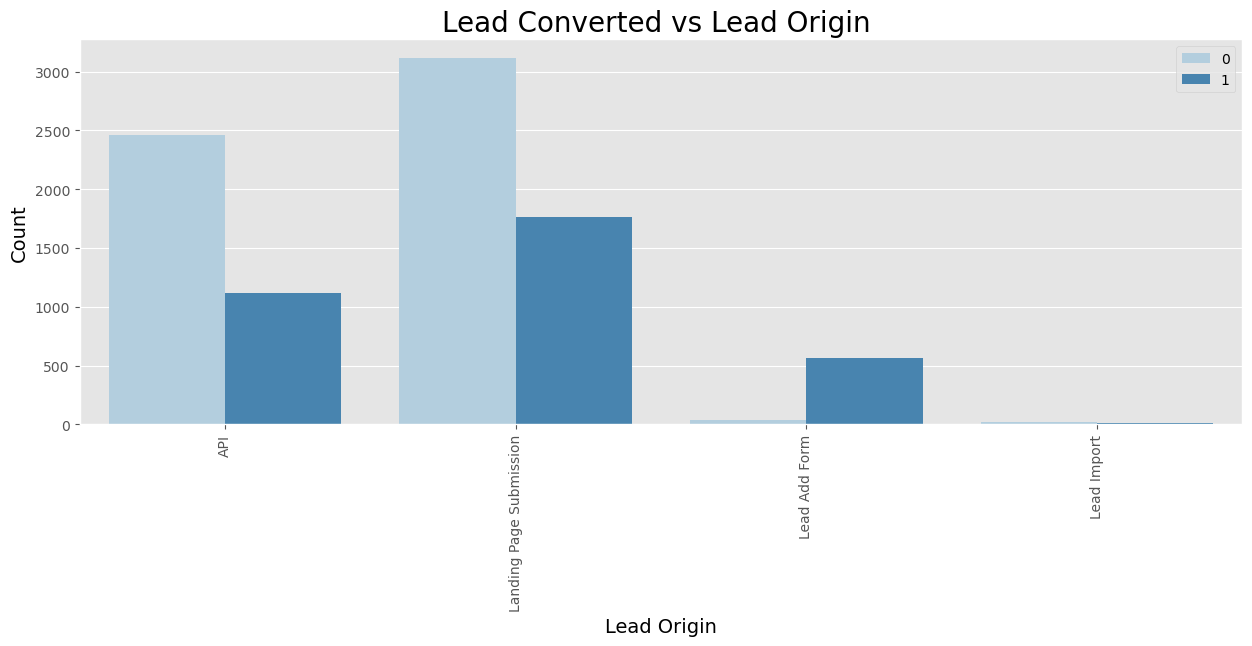

In [91]:
# Let's visulaise the Lead Origin

#Setting the frame
plt.figure(figsize=(15,5))

# We will use countplot for visualisation

count_fig=sns.countplot(x='Lead Origin', hue='Converted', data=data,palette='Blues')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Lead Converted vs Lead Origin ",fontsize=20)
plt.xlabel("Lead Origin", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

## Observations

#### - Lead conversion form has the highest conversion rate and lead generation should be increased from the same 
#### - Large number of leads are coming from "Landing page submission" followed by "API", however the conversion rate could be improved.

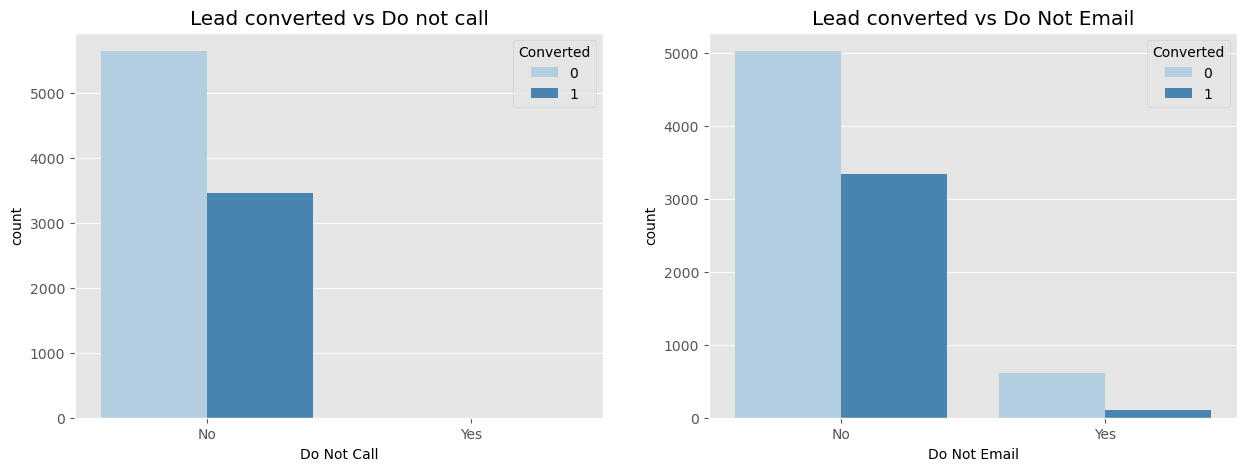

In [93]:
# There are some leads who do not wish to be contacted and have specified the same. Let's check for variables Do Not Email & Do Not Call. 

# We will use Subplot for visualisation

#Setting the frame
plt.figure(figsize=(15,5))

#Formatting the plot
ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(x='Do Not Call', hue='Converted', data=data, palette='Blues')
plt.title("Lead converted vs Do not call")

ax2=plt.subplot(1, 2, 2, sharex=ax1)
ax2=sns.countplot(x='Do Not Email', hue='Converted', data=data, palette='Blues')
plt.title("Lead converted vs Do Not Email")
plt.show()

In [94]:
# Let's check value counts for variable 'Do Not Call'

data['Do Not Call'].value_counts(dropna=False)

Do Not Call
No     9101
Yes       2
Name: count, dtype: int64

#### As 'Do not call' has 'No' as most occuring category which will create bias, we will drop it from the data

In [96]:
# Removing 'Do not call'

data.drop("Do Not Call", axis=1, inplace=True)

# Checking data post removal

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9103 non-null   object 
 1   Lead Source                               9103 non-null   object 
 2   Do Not Email                              9103 non-null   object 
 3   Converted                                 9103 non-null   int64  
 4   TotalVisits                               9103 non-null   float64
 5   Total Time Spent on Website               9103 non-null   int64  
 6   Page Views Per Visit                      9103 non-null   float64
 7   Last Activity                             9103 non-null   object 
 8   Specialization                            9103 non-null   object 
 9   What is your current occupation           9103 non-null   object 
 10  Search                                   

In [97]:
# Let's check value counts of Last Activity post imputing check value counts for variable 'Do Not Email'

data['Do Not Email'].value_counts(dropna=False)

Do Not Email
No     8379
Yes     724
Name: count, dtype: int64

In [98]:
# Let's check the ratio for 'Do Not Email'

data['Do Not Email'].value_counts(dropna=False, normalize = True)*100

Do Not Email
No     92.046578
Yes     7.953422
Name: proportion, dtype: float64

In [99]:
# Let's group some of the "Yes/No" categorical variables, check their counts and decide if they can be dropped
Check_category_var = (['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [100]:
for i in Check_category_var:
    print(i)
    print(data[i].value_counts(dropna=False))
    print("--------------------------------------------------------------------------------------------------")

Search
Search
No     9089
Yes      14
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------
Magazine
Magazine
No    9103
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------
Newspaper Article
Newspaper Article
No     9101
Yes       2
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------
X Education Forums
X Education Forums
No     9102
Yes       1
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------
Newspaper
Newspaper
No     9102
Yes       1
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------
Digital Advertisement
Digital Advertisement
No     9099
Yes       4
Name: count, dtype: int64
------------------------------------------------

#### We can observe that the above variables can be dropped to avoid bias as they have a very high count of 'No'.

In [102]:
# Removing above variables 
data.drop(Check_category_var,axis=1, inplace=True)

In [103]:
# Let's check value counts of Last Notable Activity
data ['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [104]:
# Let's consolidate categories having low occurance on the Last Notable Activity

data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                       'Unreachable','Unsubscribed','Email Bounced',
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on Website',
                                                                       'Email Received'],'Other_Notable_activity')

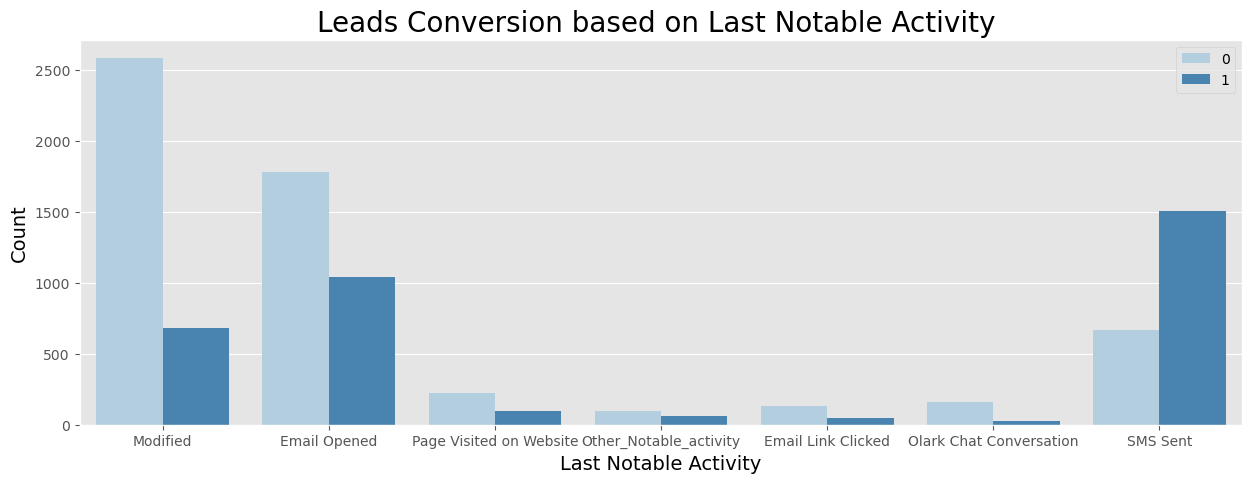

In [105]:
# Let's visulaise the Last Notable Activity

#Setting the frame
plt.figure(figsize=(15,5))

# We will use countplot for visualisation
count_fig=sns.countplot(x='Last Notable Activity', hue='Converted', data=data, palette='Blues')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=0)

#Formatting the plot
plt.title("Leads Conversion based on Last Notable Activity ",fontsize=20)
plt.xlabel("Last Notable Activity", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

## Observations

#### - Lead conversion via SMS sent has the highest conversion rate and lead generation should be increased from the same 
#### - Modified has the lowest conversion rate even though leads generated from here are the highest
#### - Leads who opened the email also have a good conversion rate which could be improved further.


In [107]:
# Let's check the count of categories under Last Notable Activity

data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: count, dtype: int64

In [108]:
# Let's check the ratio of categories under Last Notable Activity

data['Last Notable Activity'].value_counts(normalize = True)* 100

Last Notable Activity
Modified                   35.922223
Email Opened               31.055696
SMS Sent                   23.860266
Page Visited on Website     3.493354
Olark Chat Conversation     2.010326
Email Link Clicked          1.900472
Other_Notable_activity      1.757662
Name: proportion, dtype: float64

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   object 
 

In [110]:
# We will now proceed with EDA on Numerical variables

data['Converted'].value_counts()

Converted
0    5642
1    3461
Name: count, dtype: int64

In [111]:
# Let's check the ratio of Numerical variables
data['Converted'].value_counts(normalize=True)*100

Converted
0    61.979567
1    38.020433
Name: proportion, dtype: float64

## Analysis of Numerical Values based on Correlation 

In [113]:
# We will use heatmap for visualization

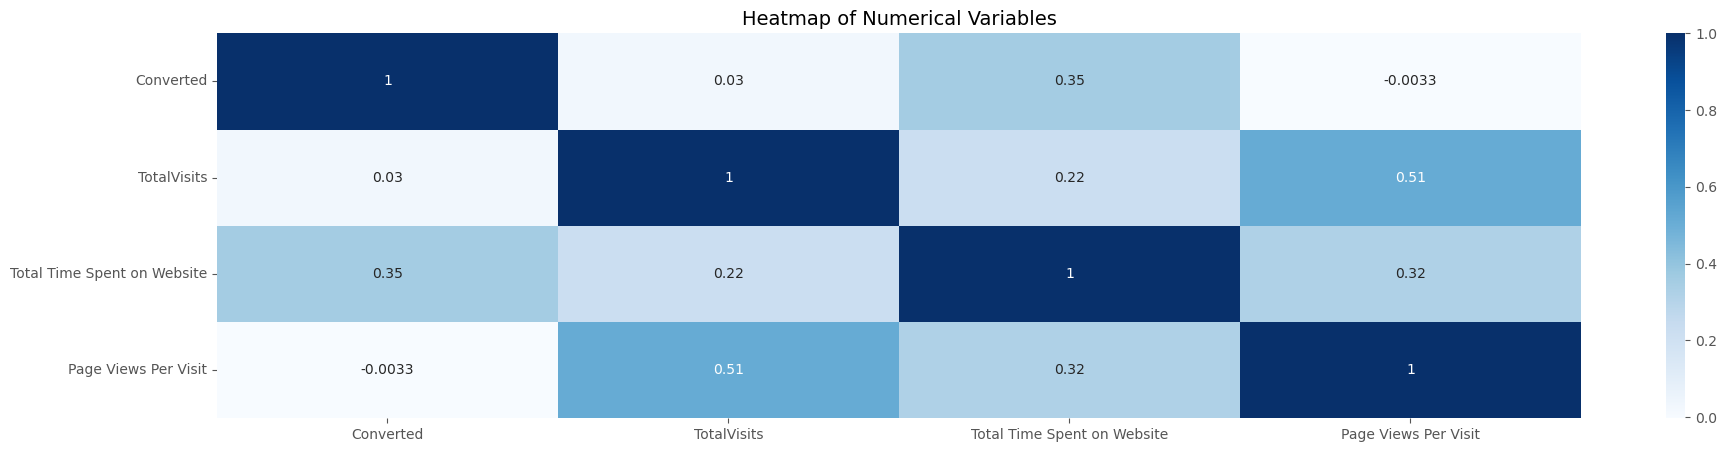

In [114]:
#Setting the frame
plt.figure(figsize=(22,5))

numeric_data = data.select_dtypes(include=["number"])

# Correlation Heatmap
sns.heatmap(numeric_data.corr(), cmap="Blues", annot=True)

plt.title("Heatmap of Numerical Variables", fontsize=14)
plt.show()

In [115]:
# As there is a higher corelation between total time spent on website and converted leads we will analyze this variable first.
data['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

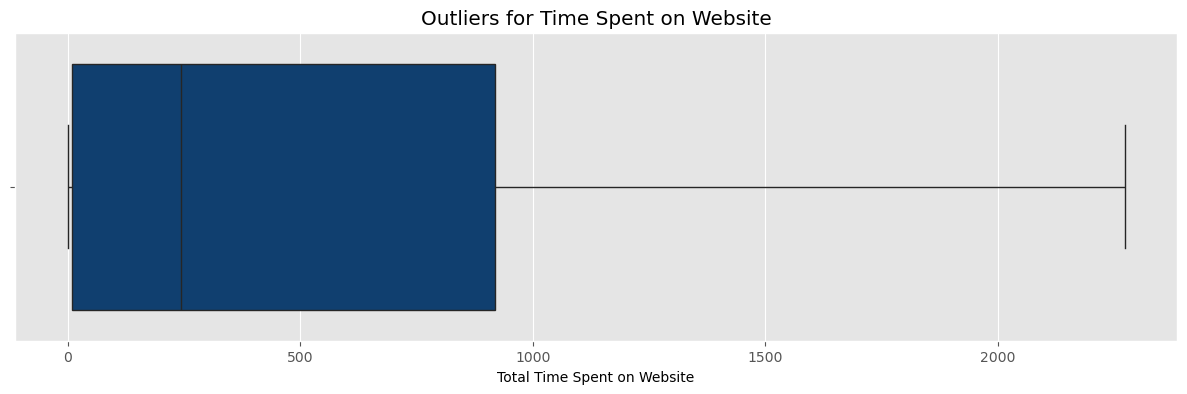

Median of "Total Time Spent on Website" =  244.0


In [116]:
# Let's check for outliers in 'Total Time Spent on Website'

# We will use boxplot for visulazition 

def plot_boxplot(variable, title):
    plt.figure(figsize=(15, 4))
    sns.boxplot(x=data[variable], palette='ocean_r')
    plt.title(title)
    plt.show()

# Total Time Spent on Website
plot_boxplot('Total Time Spent on Website', 'Outliers for Time Spent on Website')

print ('Median of "Total Time Spent on Website" = ', data['Total Time Spent on Website'].median())

#### We can observe that there are no outliers for 'Total time spent' on website.

In [118]:
# Let's check for outliers in 'TotalVists on Website'
data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

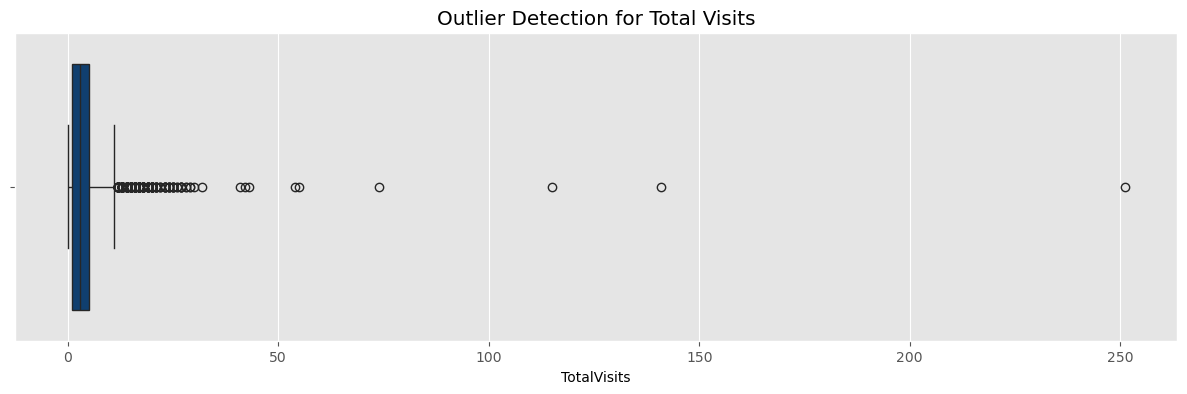

In [119]:
# We will use boxplot for visulazition 

# Setting the figure
plot_boxplot('TotalVisits', 'Outlier Detection for Total Visits')
Q3 = data['TotalVisits'].quantile(0.99)
Q1 = data['TotalVisits'].quantile(0.01)
data = data[(data['TotalVisits'] <= Q3) & (data['TotalVisits'] >= Q1)]

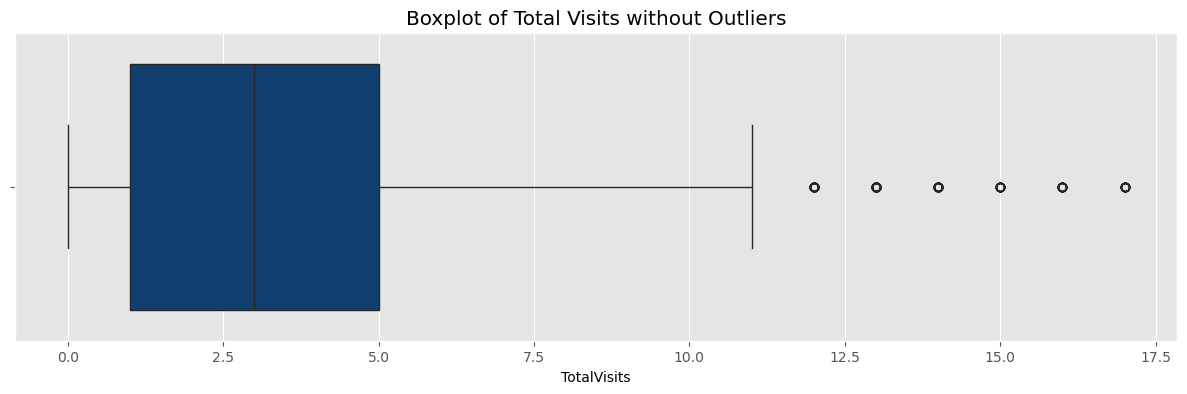

Median of TotalVisits = 3.0


In [120]:
# We will have a closer look at the boxplot of total visits and also check the median

plot_boxplot('TotalVisits', 'Boxplot of Total Visits without Outliers')

print ('Median of TotalVisits =', data['TotalVisits'].median())

In [121]:
data.shape

(9020, 14)

In [122]:
# Let's check the variable "Page Views Per Visit"

data['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

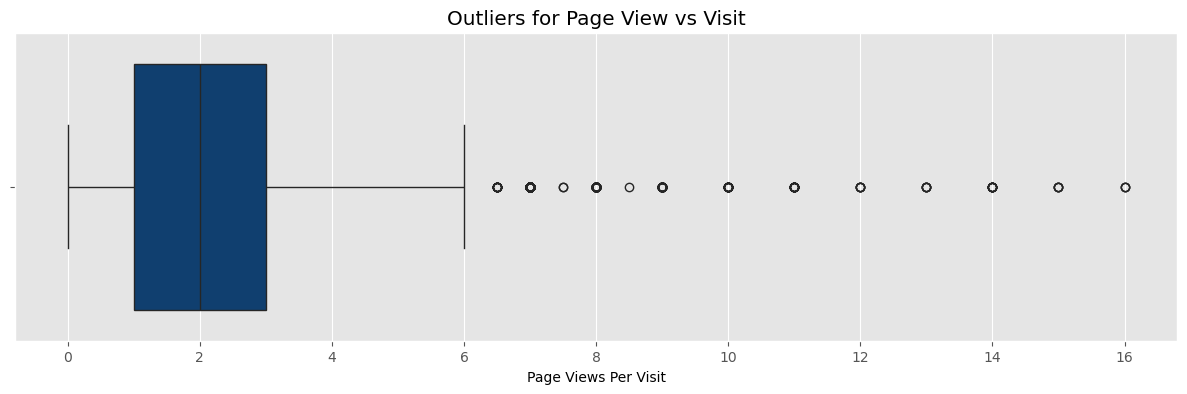

Median of Page Views Per Visit = 2.0


In [123]:
# We will use box plot for visualization

plot_boxplot('Page Views Per Visit', 'Outliers for Page View vs Visit')
print ('Median of Page Views Per Visit =', data['Page Views Per Visit'].median())

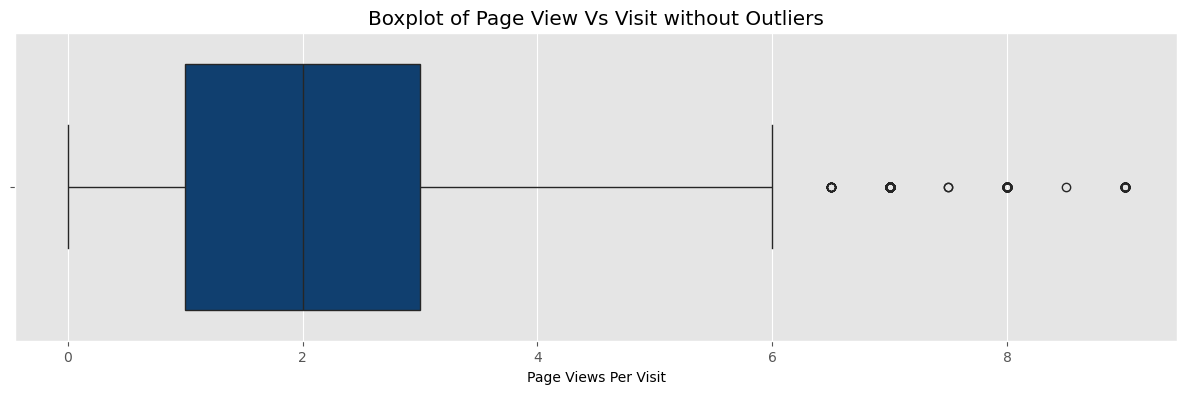

In [124]:
# As there are outliers in 'page view per visit' we will limit the capping to the top 1% and remove them. 

# Setting the figure
Q3 = data['Page Views Per Visit'].quantile(0.99)
Q1 = data['Page Views Per Visit'].quantile(0.01)
data = data[(data['Page Views Per Visit'] <= Q3) & (data['Page Views Per Visit'] >= Q1)]
plot_boxplot('Page Views Per Visit', 'Boxplot of Page View Vs Visit without Outliers')

In [125]:
# Let's check the shape of the dataset
data.shape

(8953, 14)

In [126]:
# Let's check total null values of the data
data.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### We can observe that the data does not have any more null values.

## Step 6: Model Building

In [129]:
# Listing categorical columns present in the data

categorical_vals= data.select_dtypes(include=['object']).columns
new_category_val = categorical_vals
print(categorical_vals)
print(new_category_val)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')
Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [130]:
# Let's check if we need to map the data
for i in categorical_vals:
    print(i)
    print(data[i].value_counts())
    print("--------------------------------------------------------------------------------------------------")

Lead Origin
Lead Origin
Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------
Lead Source
Lead Source
Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Others                47
Social Media          33
Live Chat              2
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------
Do Not Email
Do Not Email
No     8256
Yes     697
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------
Last Activity
Last Activity
Email Opened                 3390
SMS Sent                     2700
Olark Chat Conversation       966
Page Visited on Web

#### We can observe that there are Yes/No responses to 'A free copy of Mastering The Interview' and 'Do Not Email'. We will convert these Yes/No responses to binary values of 0 and 1. 

In [132]:
# Binary Encoding of 'Yes'/'No' variables
binary_map_variables = ['A free copy of Mastering The Interview', 'Do Not Email']
data[binary_map_variables] = data[binary_map_variables].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [133]:
# Let's check the data post mapping

data[binary_map_variables].head()

,A free copy of Mastering The Interview,Do Not Email
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [134]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [135]:
# LLet's check if we have any categorical variable present in the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8953 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   int64  
 3   Converted                               8953 non-null   int64  
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   int64  
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   Specialization                          8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   object 
 

#### Dummy Variables

In [137]:
# Let's create a function to add dummy variables to the data. 
# Our function will accept the dataframe, the list of columns for which dummy variables are to be created, the prefixes and the columns to be dropped.

import pandas as pd

def add_dummies(data, columns, prefixes=None, drop_columns=None):
    for i, col in enumerate(columns):
        prefix = prefixes[i] if prefixes else col
        drop_col = drop_columns[i] if drop_columns else None
        
        # Creation of dummy variables
        dummy = pd.get_dummies(data[col], prefix=prefix)
        
        # Drop specified columns if any
        if drop_col:
            dummy = dummy.drop(drop_col, axis=1)
        
        # Concatenate dummy variables with the original dataframe
        data = pd.concat([data, dummy], axis=1)
    return data

In [138]:
# Getting the dummy variables, dropping first column, and addition of results to master dataframe
columns = ['Lead Origin', 'What is your current occupation', 'City', 'Specialization', 'Lead Source', 'Last Activity', 'Last Notable Activity', 'Tags']
prefixes = [None, None, None, 'Specialization', 'Lead Source', 'Last Activity', 'Last Notable Activity', 'Tags']
drop_columns = [None, None, None, ['Specialization_Not Specified'], ['Lead Source_Others'], ['Last Activity_Others'], ['Last Notable Activity_Other_Notable_activity'], ['Tags_Not Tagged']]

data = add_dummies(data, columns, prefixes, drop_columns)

In [139]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,...,False,False,False,False,False,True,False,False,False,False
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,...,False,False,False,False,False,False,False,False,True,False
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,False,False,False,False,False,False,False,False,False,True
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,False,False,False,False,False,False,False,False,True,False
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,...,False,False,False,False,False,False,False,False,False,True


In [140]:
# As we have already created dummy variables for all the categorical variables, Let's remove the original columns from the data

data.drop(new_category_val, axis=1, inplace = True)

In [141]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Lead Import,Businessman,Housewife,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,5.0,674,2.5,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,2.0,1532,2.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,1.0,305,1.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1,2.0,1428,1.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8953 entries, 0 to 9239
Data columns (total 60 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Converted                                         8953 non-null   int64  
 1   TotalVisits                                       8953 non-null   float64
 2   Total Time Spent on Website                       8953 non-null   int64  
 3   Page Views Per Visit                              8953 non-null   float64
 4   API                                               8953 non-null   bool   
 5   Landing Page Submission                           8953 non-null   bool   
 6   Lead Add Form                                     8953 non-null   bool   
 7   Lead Import                                       8953 non-null   bool   
 8   Businessman                                       8953 non-null   bool   
 9   Housewife               

## Logistic Regression

### Let's Split the data into Training and Testing Set with 70/30 Ratio

In [145]:
y = data['Converted'] # Target Variable

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [146]:
# Independent Variables
X=data.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Lead Import,Businessman,Housewife,Other,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
0,0.0,0,0.0,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,5.0,674,2.5,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2.0,1532,2.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1.0,305,1.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2.0,1428,1.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [148]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Lead Import,Businessman,Housewife,Other,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
9196,5.0,1490,5.00,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4696,3.0,457,3.00,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3274,4.0,126,2.00,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2164,2.0,393,2.00,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1667,4.0,1167,1.33,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [149]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Lead Import,Businessman,Housewife,Other,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
7681,5.0,311,2.5,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
984,3.0,183,3.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8135,2.0,913,2.0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6915,4.0,141,2.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2712,3.0,252,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [150]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 9196 to 5825
Data columns (total 59 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   TotalVisits                                       6267 non-null   float64
 1   Total Time Spent on Website                       6267 non-null   int64  
 2   Page Views Per Visit                              6267 non-null   float64
 3   API                                               6267 non-null   bool   
 4   Landing Page Submission                           6267 non-null   bool   
 5   Lead Add Form                                     6267 non-null   bool   
 6   Lead Import                                       6267 non-null   bool   
 7   Businessman                                       6267 non-null   bool   
 8   Housewife                                         6267 non-null   bool   
 9   Other                

In [151]:
X_train.shape

(6267, 59)

In [152]:
X_test.shape

(2686, 59)

In [153]:
y_train.head()

9196    1
4696    0
3274    0
2164    0
1667    1
Name: Converted, dtype: int64

In [154]:
y_test.head()

7681    0
984     0
8135    0
6915    0
2712    1
Name: Converted, dtype: int64

In [155]:
y_train.shape

(6267,)

In [156]:
y_test.shape

(2686,)

### We will now proceed with Scaling of the data

In [158]:
scaler = StandardScaler()
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [159]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Lead Import,Businessman,Housewife,Other,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4696,-0.030697,-0.037832,0.399961,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3274,0.319082,-0.642138,-0.127967,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2164,-0.380477,-0.154676,-0.127967,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1667,0.319082,1.258415,-0.481679,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Logistic Regression using Stats Model & RFE:

In [161]:
# Creating an instance of Logistic Regression
log_reg = LogisticRegression()

In [162]:
rfe = RFE(estimator=log_reg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

#printing the output 
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True])

In [163]:
# Let's combine the output along with the data
Zipped_data = zip(X_train.columns, rfe.support_, rfe.ranking_)
Zipped_data = list(Zipped_data)
Zipped_data

[('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('API', False, 15),
 ('Landing Page Submission', False, 10),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 28),
 ('Businessman', False, 40),
 ('Housewife', False, 32),
 ('Other', False, 35),
 ('Student', False, 24),
 ('Unemployed', False, 21),
 ('Working Professional', False, 8),
 ('Mumbai', False, 43),
 ('Other Cities', False, 23),
 ('Other Cities of Maharashtra', False, 37),
 ('Other Metro Cities', False, 42),
 ('Thane & Outskirts', False, 39),
 ('Tier II Cities', False, 30),
 ('Specialization_Banking, Investment And Insurance', False, 16),
 ('Specialization_Business Administration', False, 44),
 ('Specialization_E-Business', False, 36),
 ('Specialization_E-COMMERCE', False, 22),
 ('Specialization_International Business', False, 41),
 ('Specialization_Media and Advertising', False, 34),
 ('Specialization_Mngt_Specialization', False, 38),
 ('Specialization_Rural and Ag

In [164]:
# Let's check the rfe Supported columns
rfe_support_col = X_train.columns[rfe.support_]
rfe_support_col

Index(['Total Time Spent on Website', 'Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

In [165]:
# Let's check the columns which are not supported by RFE

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'API', 'Landing Page Submission',
       'Lead Import', 'Businessman', 'Housewife', 'Other', 'Student',
       'Unemployed', 'Working Professional', 'Mumbai', 'Other Cities',
       'Other Cities of Maharashtra', 'Other Metro Cities',
       'Thane & Outskirts', 'Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Mngt_Specialization',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Last Activity_Converted to Lead',
       'Last Activ

In [166]:
# Let's build a Model with selected features

X_train = X_train.astype(int)
X_train_sm = sm.add_constant(X_train)

y_train = y_train.astype(int)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train.fillna(0, inplace=True)

X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = log_model1.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1311.8
Date:                Mon, 17 Feb 2025   Deviance:                       2623.5
Time:                        01:01:24   Pearson chi2:                 9.89e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5975
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

#### We can see that "Lead Source_Referral Sites" has the highest P-value. We will drop this variable and proceed with model building. 

In [168]:
rfe_support_col = rfe_support_col.drop('Lead Source_Referral Sites',1)


In [169]:
# Let's check the model after removing the Lead Source Referral Sites
X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = log_model2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1312.1
Date:                Mon, 17 Feb 2025   Deviance:                       2624.2
Time:                        01:01:24   Pearson chi2:                 9.88e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5975
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

#### As all the P-values are 0, we can check the VIF Variance Inflation Factor to find if any correlation  exists between the variables.

In [171]:
# Let's create a dataframe containing names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_col].values, i) for i in range(X_train[rfe_support_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.23
4,Last Activity_SMS Sent,6.11
1,Lead Add Form,1.72
5,Last Notable Activity_Modified,1.66
13,Tags_Will revert after reading the email,1.64
2,Lead Source_Direct Traffic,1.39
0,Total Time Spent on Website,1.34
3,Lead Source_Welingak Website,1.34
11,Tags_Others,1.26
8,Tags_Closed by Horizzon,1.21


#### We can observe that there is a high correlation between the variables "Last Notable Activity_SMS Sent" and "Last Activity_SMS Sent". We will proceed to drop the variables one by one based on their values.

In [173]:
# As "Last Notable Activity_SMS Sent" has a higher VIF we will drop it first
rfe_support_col = rfe_support_col.drop('Last Notable Activity_SMS Sent')

In [174]:
# Let's check the model post dropping above variable
X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = log_model3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1319.2
Date:                Mon, 17 Feb 2025   Deviance:                       2638.3
Time:                        01:01:25   Pearson chi2:                 1.02e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5965
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [175]:
# Let's create a dataframe containing names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_col].values, i) for i in range(X_train[rfe_support_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Add Form,1.72
12,Tags_Will revert after reading the email,1.60
4,Last Activity_SMS Sent,1.48
2,Lead Source_Direct Traffic,1.38
5,Last Notable Activity_Modified,1.37
0,Total Time Spent on Website,1.34
3,Lead Source_Welingak Website,1.34
10,Tags_Others,1.24
7,Tags_Closed by Horizzon,1.21
11,Tags_Ringing,1.16


#### As all the VIF values have dropped below 5, we will proceed to interpret Probabilities, Lead Score and Predictions on Train Data.

In [177]:
# Let's Predict 10 values of the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.170209
4696    0.028335
3274    0.643142
2164    0.005699
1667    0.988475
7024    0.188765
8018    0.034539
778     0.248382
6942    0.004040
4440    0.106301
dtype: float64

In [178]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17020936, 0.0283347 , 0.64314243, 0.00569892, 0.98847501,
       0.18876452, 0.03453949, 0.24838241, 0.00404002, 0.10630075])

In [179]:
# Let's convert the predicted variable into a dataframe
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

# Setting Prospect ID as Index
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.170209,9196
1,0,0.028335,4696
2,0,0.643142,3274
3,0,0.005699,2164
4,1,0.988475,1667


In [180]:
# Let's predict the output and check how the model performs

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.170209,9196,0
1,0,0.028335,4696,0
2,0,0.643142,3274,1
3,0,0.005699,2164,0
4,1,0.988475,1667,1


In [181]:
# Let's check how the model performs using Confusion Matrix

# Predictions
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[3731  151]
 [ 331 2054]]


In [182]:
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

print("Accuracy:", accuracy)
print ("True positive = ",TP)
print ("True negatives = ",TN)
print ("False positives = ",FP)
print ("False negatives = ",FN)

Accuracy: 0.9230891973831179
True positive =  2054
True negatives =  3731
False positives =  151
False negatives =  331


#### We can observe that the accuracy is very high and hence this is a good predition with the model

#### Let's check the sensitivity and Specificity

In [185]:
# Sensitivity
Sensitivity = round(TP / float(TP+FN)*100,2)
print('Sensitivity = ',Sensitivity,'%')

Sensitivity =  86.12 %


In [186]:
# Specificity
Specificity = round(TN / float(TN+FP)*100,2)
print('Specificity = ',Specificity,'%')

Specificity =  96.11 %


In [187]:
# Let's calculate the False Postive Rate which indicates the probability of falsely rejecting the null hypothesis

print(FP/ float(TN+FP))

0.03889747552807831


In [188]:
# Positive Predictive Value 
print (TP / float(TP+FP))

0.9315192743764172


In [189]:
# Negative Predictive Value
print (TN / float(TN+ FN))

0.9185130477597243


#### We can observe from the above analysis that our predictive model is good

#### ROC CURVE

In [192]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(10, 4))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    return auc_score

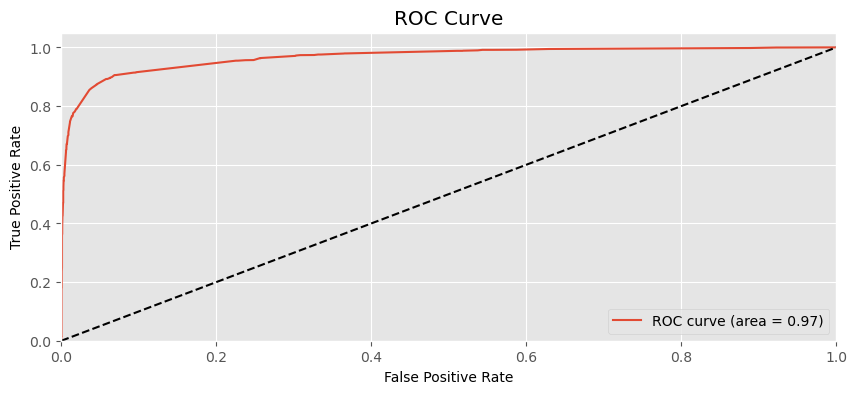

AUC: 0.9670604639809388


In [193]:
# Plot ROC curve
auc_score = draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
print('AUC:', auc_score)

#### ROC curves with a value closer to 1 indicate a good predictive model. We can observe ROC curve 0.97 in the above chart which reflects a good model.

#### Let's find the Optimal Cutoff Point

In [196]:
# Creating columns with different probability cutoffs 
cutoffs = [float(x) / 10 for x in range(10)]
for cutoff in cutoffs:
    y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > cutoff else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted
9196,1,0.170209,0
4696,0,0.028335,0
3274,0,0.643142,0
2164,0,0.005699,0
1667,1,0.988475,1


In [197]:
# Finding Optimal Cutoff
cutoffs = [float(x) / 10 for x in range(10)]
for cutoff in cutoffs:
    y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > cutoff else 0)
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
    sensitivity = TP / float(TP + FN)
    specificity = TN / float(TN + FP)
    print(f"Cutoff {cutoff} - Sensitivity: {sensitivity}, Specificity: {specificity}, Accuracy: {accuracy}")

Cutoff 0.0 - Sensitivity: 1.0, Specificity: 0.0, Accuracy: 0.38056486357108665
Cutoff 0.1 - Sensitivity: 0.9723270440251572, Specificity: 0.6970633693972179, Accuracy: 0.8018190521780756
Cutoff 0.2 - Sensitivity: 0.9144654088050315, Specificity: 0.9039155074703761, Accuracy: 0.9079304292324877
Cutoff 0.3 - Sensitivity: 0.8985324947589098, Specificity: 0.9350850077279753, Accuracy: 0.9211744056167225
Cutoff 0.4 - Sensitivity: 0.8922431865828092, Specificity: 0.9407521895929933, Accuracy: 0.9222913674804532
Cutoff 0.5 - Sensitivity: 0.8612159329140461, Specificity: 0.9611025244719217, Accuracy: 0.9230891973831179
Cutoff 0.6 - Sensitivity: 0.8549266247379455, Specificity: 0.9639361154044307, Accuracy: 0.9224509334609862
Cutoff 0.7 - Sensitivity: 0.7811320754716982, Specificity: 0.9827408552292632, Accuracy: 0.9060156374660923
Cutoff 0.8 - Sensitivity: 0.7651991614255765, Specificity: 0.9858320453374549, Accuracy: 0.9018669219722355
Cutoff 0.9 - Sensitivity: 0.7010482180293501, Specificity

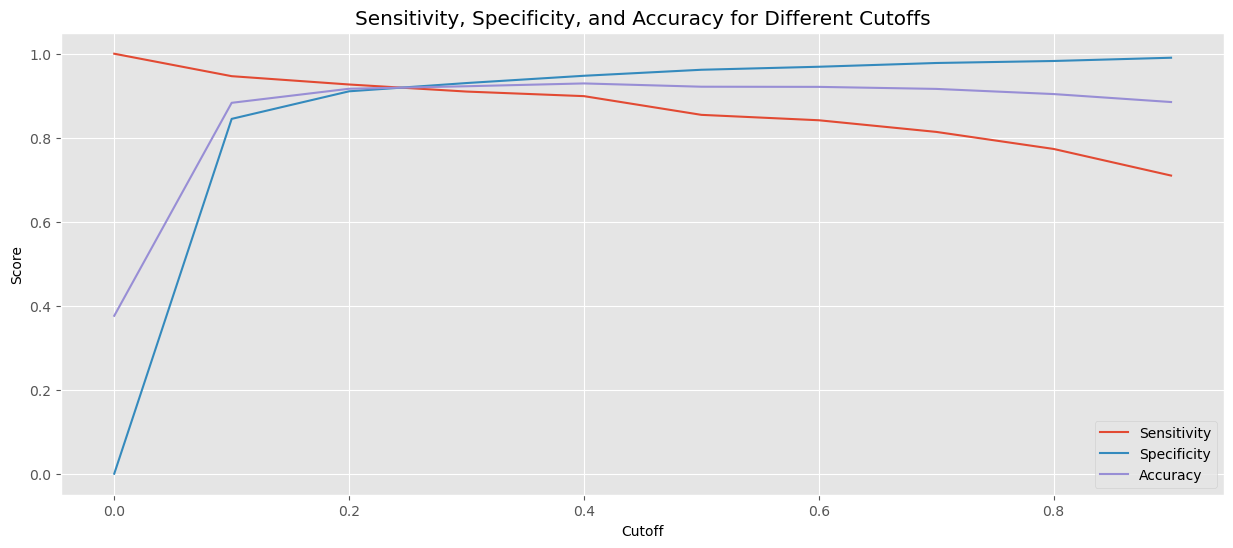

In [201]:
# Let's check on different cutoffs by plotting a graph

from sklearn.metrics import confusion_matrix

sensitivity_list = []
specificity_list = []
accuracy_list = []

model = log_reg
log_reg.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

for cutoff in cutoffs:
    y_pred = (y_pred_proba >= cutoff).astype(int) 
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    accuracy_list.append(accuracy)

plt.figure(figsize=(15, 6))
plt.plot(cutoffs, sensitivity_list, label='Sensitivity', marker='')
plt.plot(cutoffs, specificity_list, label='Specificity', marker='')
plt.plot(cutoffs, accuracy_list, label='Accuracy', marker='')
plt.xlabel('Cutoff')
plt.ylabel('Score')
plt.title('Sensitivity, Specificity, and Accuracy for Different Cutoffs')
plt.legend()
plt.grid(True)
plt.show()

In [203]:
# Observing the above graph we will choose an optimal cutoff at 0.3
optimal_cutoff = 0.3
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > optimal_cutoff else 0)
final_accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['Final_Predicted'])
final_confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final['Final_Predicted'])
print("Optimal Accuracy:", final_accuracy)
print("Optimal Confusion Matrix:", final_confusion_matrix)

Optimal Accuracy: 0.9211744056167225
Optimal Confusion Matrix: [[3630  252]
 [ 242 2143]]


In [204]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Predicted,Final_Predicted
9196,1,0.170209,0,0
4696,0,0.028335,0,0
3274,0,0.643142,0,1
2164,0,0.005699,0,0
1667,1,0.988475,1,1


In [205]:
y_train_pred_final

,Converted,Converted_prob,Predicted,Final_Predicted
9196,1,0.170209,0,0
4696,0,0.028335,0,0
3274,0,0.643142,0,1
2164,0,0.005699,0,0
1667,1,0.988475,1,1
...,...,...,...,...
379,1,0.813910,0,1
84,1,0.940215,1,1
8313,0,0.002069,0,0
7169,0,0.188765,0,0


In [206]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Final_Predicted,Lead_Score
9196,1,0.170209,0,17
4696,0,0.028335,0,3
3274,0,0.643142,1,64
2164,0,0.005699,0,1
1667,1,0.988475,1,99


In [207]:
# Checking overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.9211744056167225

In [208]:
Confusion_matrix_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
Confusion_matrix_2

array([[3630,  252],
       [ 242, 2143]], dtype=int64)

In [209]:
TP = Confusion_matrix_2[1,1] # true positive 
TN = Confusion_matrix_2[0,0] # true negatives
FP = Confusion_matrix_2[0,1] # false positives
FN = Confusion_matrix_2[1,0] # false negatives

In [210]:
# Let's check the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8985324947589098

In [211]:
# Let's check the specificity
TN / float(TN+FP)

0.9350850077279753

#### Observations on Training Data

##### - Accuracy : 92.11%
##### - Sensitivity : 89.85%
##### - Specificity : 93.50%

In [214]:
# Let's check the false positive rate
print(FP/ float(TN+FP))

0.06491499227202473


In [215]:
# Let's check the Positive predictive value 
print (TP / float(TP+FP))

0.8947807933194154


In [216]:
# Let's check the Negative predictive value 
print (TN / float(TN+ FN))

0.9375


In [217]:
# Let's check the confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion

array([[3630,  252],
       [ 242, 2143]], dtype=int64)

### Precision

In [219]:
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8947807933194154

## Recall

In [221]:
TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8985324947589098

In [222]:
# Let's check the Precision Score
precision_score(y_train_pred_final.Converted , y_train_pred_final.Final_Predicted)

0.8947807933194154

In [223]:
# Let's check the Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8985324947589098

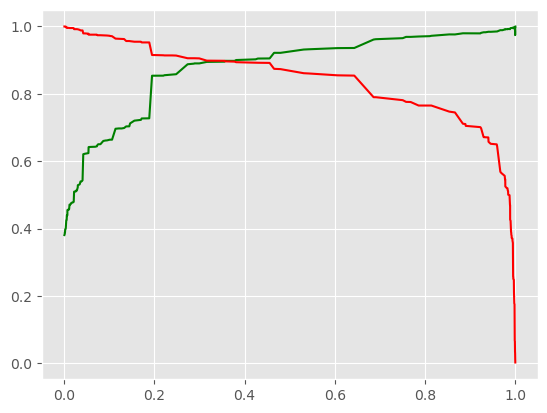

In [224]:
# Let's check the Precision Recall Curve
y_train_pred_final.Converted, y_train_pred_final.Final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Data Scaling for Test Set

In [226]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Lead Import,Businessman,Housewife,Other,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
984,-0.090676,-0.550262,0.356568,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8135,-0.423857,0.812462,-0.170849,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6915,0.242505,-0.628665,-0.170849,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2712,-0.090676,-0.421456,0.356568,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [227]:
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Businessman', 'Housewife', 'Other', 'Student', 'Unemployed',
       'Working Professional', 'Mumbai', 'Other Cities',
       'Other Cities of Maharashtra', 'Other Metro Cities',
       'Thane & Outskirts', 'Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Mngt_Specialization',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
   

## Step 8: Model Evaluation

#### Evaluation of the Test Set

In [237]:
X_test_sm = sm.add_constant(X_test[rfe_support_col])
X_test_sm = X_test_sm.apply(pd.to_numeric, errors='coerce')

In [239]:
print("Missing values:\n", X_test_sm.isna().sum())

Missing values:
 const                                            0
Total Time Spent on Website                      0
Lead Add Form                                    0
Lead Source_Direct Traffic                       0
Lead Source_Welingak Website                     0
Last Activity_SMS Sent                           0
Last Notable Activity_Modified                   0
Last Notable Activity_Olark Chat Conversation    0
Tags_Closed by Horizzon                          0
Tags_Interested in other courses                 0
Tags_Lost to EINS                                0
Tags_Others                                      0
Tags_Ringing                                     0
Tags_Will revert after reading the email         0
dtype: int64


In [240]:
print("Infinite values:\n", np.isinf(X_test_sm).sum())

Infinite values:
 const                                            0
Total Time Spent on Website                      0
Lead Add Form                                    0
Lead Source_Direct Traffic                       0
Lead Source_Welingak Website                     0
Last Activity_SMS Sent                           0
Last Notable Activity_Modified                   0
Last Notable Activity_Olark Chat Conversation    0
Tags_Closed by Horizzon                          0
Tags_Interested in other courses                 0
Tags_Lost to EINS                                0
Tags_Others                                      0
Tags_Ringing                                     0
Tags_Will revert after reading the email         0
dtype: int64


In [241]:
# Data predictions

X_test_sm = X_test[rfe_support_col].copy()
X_test_sm = X_test_sm.apply(pd.to_numeric, errors='coerce')
X_test_sm = X_test_sm.fillna(0)
X_test_sm = X_test_sm.astype(float)
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm = X_test_sm[X_train_sm.columns]
assert not X_test_sm.isna().sum().any()
assert not np.isinf(X_test_sm).sum().any()

if not hasattr(res, 'predict'):
    res = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()


y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Converted': y_test.values, 'Converted_prob': y_test_pred})
y_test_pred_final['Predicted'] = y_test_pred_final['Converted_prob'].map(lambda x: 1 if x > optimal_cutoff else 0)

In [242]:
# Accuracy
test_accuracy = metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9251675353685778


In [243]:
# Test confusion matrix
test_confusion_matrix = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
print("Test Confusion Matrix:", test_confusion_matrix)

Test Confusion Matrix: [[1562  114]
 [  87  923]]


In [244]:

# Let's check the Sensitivity
TP_test = test_confusion_matrix[1, 1]
TN_test = test_confusion_matrix[0, 0]
FP_test = test_confusion_matrix[0, 1]
FN_test = test_confusion_matrix[1, 0]

test_sensitivity = round(TP_test / float(TP_test + FN_test) * 100, 2)
print('Test Sensitivity:', test_sensitivity, '%') 

Test Sensitivity: 91.39 %


In [245]:
# Let's check the Specificity 
test_specificity = round(TN_test / float(TN_test + FP_test) * 100, 2)
print('Test Specificity:', test_specificity, '%')

Test Specificity: 93.2 %


#### Observations on Testing Data

##### - Accuracy : 92.51%
##### - Sensitivity : 91.39%
##### - Specificity : 93.2%

#### Comparing Testing and Training Data Values

#### Training Data

- Accuracy : 92.11%
- Sensitivity : 89.85%
- Specificity : 93.50%

#### Testing Data

- Accuracy : 92.51%
- Sensitivity : 91.39%
- Specificity : 93.2%

#### We can conclude that the model is predicting the conversion rate accurately.